Fuentes:

- https://www.tensorflow.org/tutorials/images/cnn 

- Deep Learning with Python, Francis Chollet. Capítulo 5. 

- https://github.com/gabrielpierobon/cnnshapes 

- Deep Learning, Goodfellow, et al. Capítulo 9.

## ¿Qué es una convolución?


### Las capas densas aprenden patrones globales, mientras que las convolucionales aprenden patrones locales. 

![](![](https://raw.githubusercontent.com/igomezv/DLCIMATAGS/main/notebooks/img/parts.png)

- Los patrones que aprenden son invariantes.

- Pueden aprender jerarquías espaciales de los patrones. 

![](https://raw.githubusercontent.com/igomezv/DLCIMATAGS/main/notebooks/img/patterns.png)


Las convoluciones opearan sobre tensores 3D, llamados **mapas de características (*feature maps*)** con dos ejes espaciales (altura y ancho)y un eje de profundidad conocido como eje de canales. 

La operación de convolución extrae cuadros (patches) desde su mapa de características y aplica la misma transformación a todos estos cuadros, produciendo como salida un mapa de características.

El mapa de características de salida sigue siendo un tensor 3D con profundidad arbitraria. A diferencia de un tensor de RGB, la profundidad no indica color, sino filtros. 

![](https://raw.githubusercontent.com/igomezv/DLCIMATAGS/main/notebooks/img/1_filter.png)

Las convoluciones se definen por dos parámetros clave:
    
- El tamaño de los cuadros a extraer de las entradas. Por lo regular 3x3 o 5x5. 
- La profundidad del mapa de características de salida. El número de filtros calculados por la convolución. 

La convolución "desliza" las ventanas de 3x3 o 5x5 sobre el mapa de características de entrada: 

![](https://raw.githubusercontent.com/igomezv/DLCIMATAGS/main/notebooks/img/convolution.png)


![](https://miro.medium.com/max/1400/1*D6iRfzDkz-sEzyjYoVZ73w.gif)


![](https://raw.githubusercontent.com/igomezv/DLCIMATAGS/main/notebooks/img/conv_fn.png)


## Padding para borde

![](https://raw.githubusercontent.com/igomezv/DLCIMATAGS/main/notebooks/img/padding.png)

En keras  <code> padding='valid' </code> no modifica nada, pero <code> padding='same'</code> agrega ceros a la izquierda/derecha o arriba/abajo de la entrada. 


## Stride

El uso de un stride igual a 2 significa que la anchura y la altura del mapa de características se reducen en un factor de 2. En la práctica, las convoluciones con strides no se suelen utilizar, aunque pueden ser útiles para algunos tipos de modelos.

![](https://raw.githubusercontent.com/igomezv/DLCIMATAGS/main/notebooks/img/stride.png)

Para reducir la muestra de los mapas de características, en lugar de los strides, se suele utilizar la operación de max-pooling, que se ha visto en acción en el primer ejemplo de convnet. 


## Max-pooling

![](https://raw.githubusercontent.com/igomezv/DLCIMATAGS/main/notebooks/img/maxpooling_motivation.png)

El Max pooling consiste en extraer ventanas de los mapas de características de entrada y sacar el valor máximo de cada canal. Es conceptualmente similar a la convolución, excepto que en lugar de transformar los cuadros (patches) locales a través de una transformación lineal aprendida (el kernel de convolución), se transforman a través de una operación de estadística de resumen, en particular *max*.

La razón para utilizar el downsampling es reducir el número de coeficientes del mapa de características que hay que procesar, así como inducir jerarquías de filtros espaciales haciendo que las sucesivas capas de convolución miren **ventanas cada vez más grandes**.


![](https://nico-curti.github.io/NumPyNet/NumPyNet/images/maxpool.gif)


## ¿Qué es una pared convolucional en una red neuronal?

![](https://miro.medium.com/max/1200/1*QPRC1lcfYxcWWPAC2hrQgg.gif)

![](https://raw.githubusercontent.com/igomezv/DLCIMATAGS/main/notebooks/img/terminology_conv.png)

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# %matplotlib inlineimport glob
# import matplotlib
# from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
# import imageio as im
from keras import models
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

2022-03-28 09:44:32.435474: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-28 09:44:32.435491: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [28]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

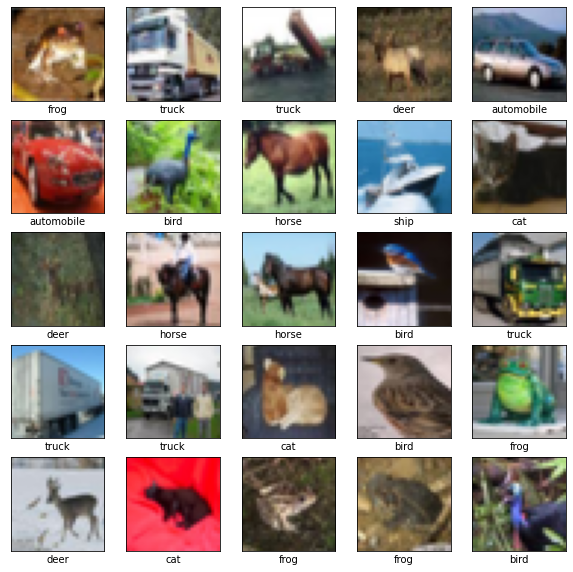

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [30]:
len(train_images)

50000

In [4]:
checkpointer = ModelCheckpoint(filepath="best_weights.hdf5", 
                               monitor = 'val_acc',
                               verbose=1, 
                               save_best_only=True)

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='same', 
                        activation='relu', input_shape=(32, 32, 3),
                        use_bias=True,
                        kernel_initializer='glorot_uniform', bias_initializer='zeros', 
                        kernel_regularizer=None, bias_regularizer=None, 
                        activity_regularizer=None,  kernel_constraint=None,
                        bias_constraint=None))
          
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)               

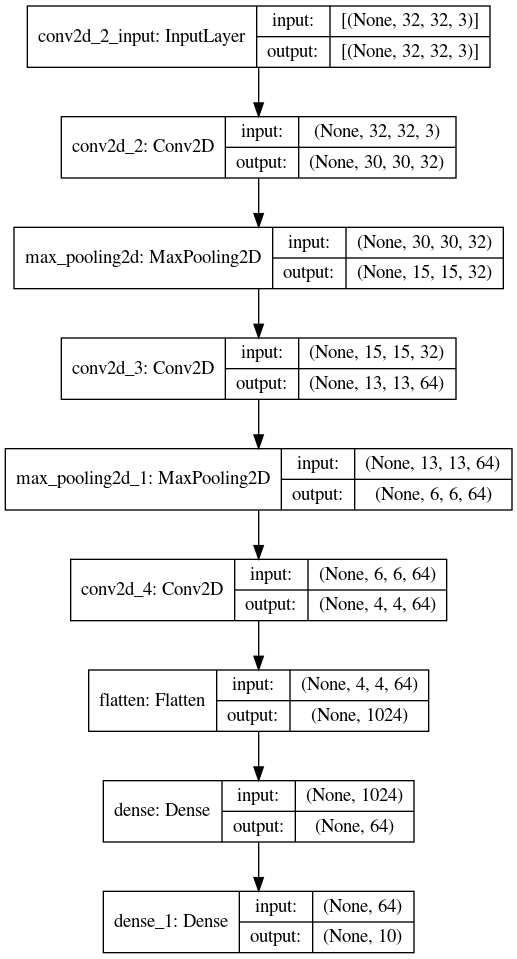

In [14]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               loss=tf.keras.losses.mean_squared_error,
              metrics=['accuracy'])

In [16]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels),  callbacks=[checkpointer])

2022-03-28 09:45:38.491031: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5319 - accuracy: 0.4377 - val_loss: 1.3186 - val_accuracy: 0.5197
Epoch 2/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.1695 - accuracy: 0.5856 - val_loss: 1.1142 - val_accuracy: 0.6021
Epoch 3/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.0204 - accuracy: 0.6434 - val_loss: 1.0579 - val_accuracy: 0.6230
Epoch 4/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.9244 - accuracy: 0.6760 - val_loss: 0.9377 - val_accuracy: 0.6706
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.8548 - accuracy: 0.7018 - val_loss: 0.9064 - val_accuracy: 0.6843
Epoch 6/10
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7992 - accuracy: 0.7211 - val_loss: 0.8732 - val_accuracy: 0.7041
Epoch 7/10
1563/1563 [==============================] - 15s 10ms/step - loss: 0.7497 - accuracy: 0.7383 - val_loss: 0.8865 -

313/313 - 1s - loss: 0.8568 - accuracy: 0.7103


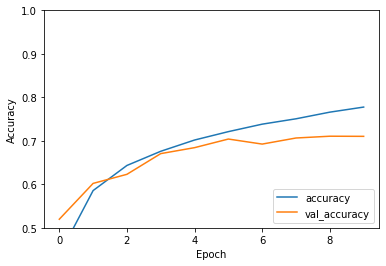

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [18]:
print(test_acc)

0.7103000283241272


In [19]:
model.save_weights('best_weights.hdf5')

In [20]:
model.load_weights('best_weights.hdf5')

In [21]:
model.save('shapes_cnn.h5')

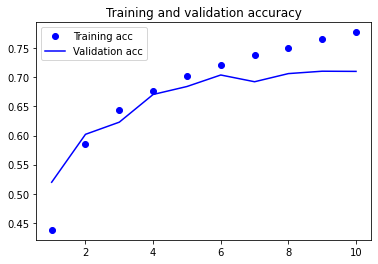

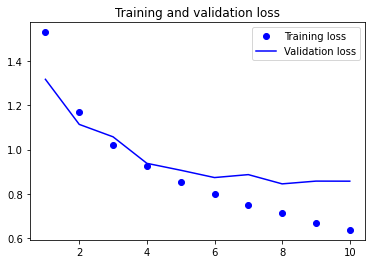

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [76]:
layer_outputs = [layer.output for layer in model.layers[:5]] 
# Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [77]:
img_tensor = test_images[0]
img_tensor = tf.expand_dims(img_tensor, axis=0)
activations = activation_model.predict(img_tensor) 
# Returns a list of five Numpy arrays: one array per layer activation

In [78]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 30, 30, 32)


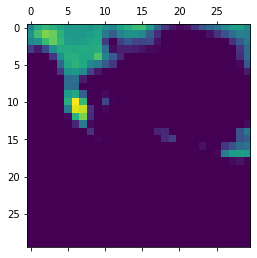

In [79]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

/tmp/ipykernel_15174/3589179688.py:16: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


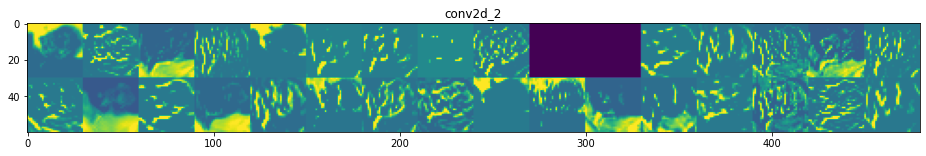

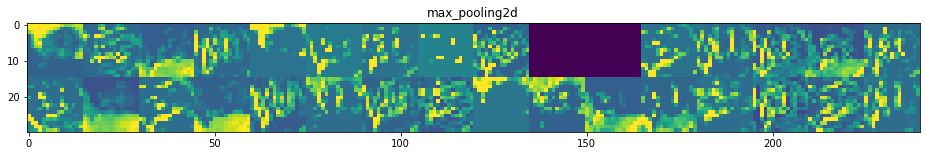

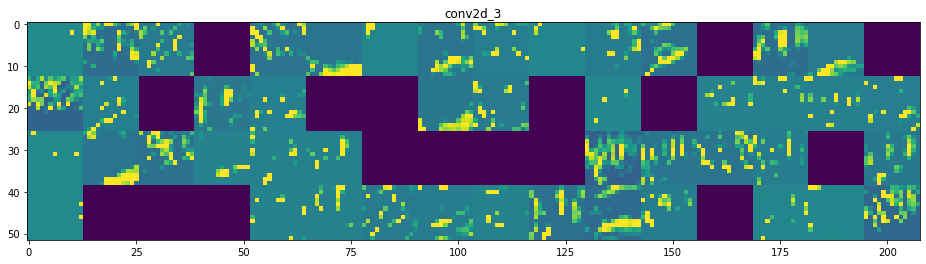

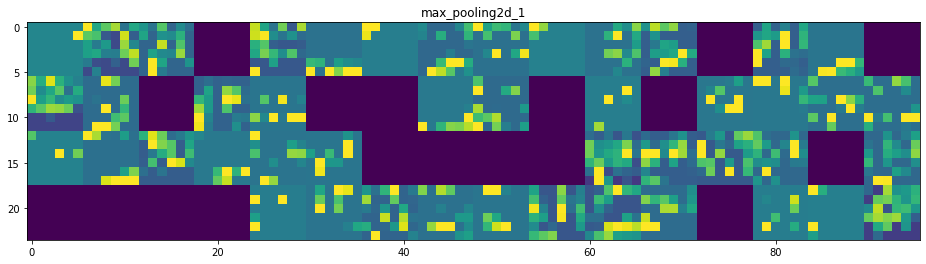

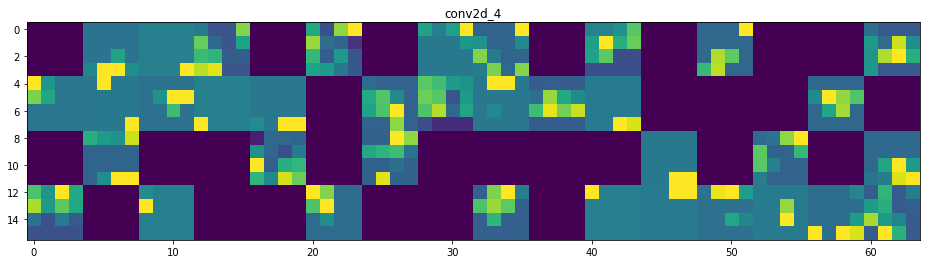

In [80]:
layer_names = []
for layer in model.layers[:12]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,:,:, col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')